In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
from swmm_api import read_out_file
import os

In [2]:
from matplotlib import rcParams

config = {
            "font.family": 'serif',
            "font.size": 12,# 相当于小四大小
            "mathtext.fontset": 'stix',#matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
            "font.serif": ['Times New Roman'],#宋体
            'axes.unicode_minus': False # 处理负号，即-号
         }
rcParams.update(config)

In [3]:
rainid = np.load('./step0-knowledge/rainfall/testRainID.npy',allow_pickle=True).tolist()
print(rainid)

[10, 20, 30, 40, 50, 55, 60, 65, 70, 80]


# Load results files

In [4]:
results_BC, results_EFD, results_OPT = {}, {}, {}
results_PPO, results_PPO_nosafe, results_PPO_pre, results_PPO_KG = {}, {}, {}, {}
results_DQN, results_DQN_nosafe, results_DQN_pre, results_DQN_KG = {}, {}, {}, {}

for i in rainid:
    results_BC['rain'+str(i)] = np.load('./step0-knowledge/BC_results/bc_results_rain'+str(i)+'.npy',allow_pickle=True).tolist()
    results_EFD['rain'+str(i)] = np.load('./step0-knowledge/EFD_results/efd_results_rain'+str(i)+'.npy',allow_pickle=True).tolist()
    results_OPT['rain'+str(i)] = np.load('./step0-knowledge/OPT_results/opt_results_rain'+str(i)+'.npy',allow_pickle=True).tolist()

    results_PPO['rain'+str(i)] = np.load('./step3-DRL fullnosafe/results/ppo_results_rain'+str(i)+'.npy',allow_pickle=True).tolist()
    #results_PPO_nosafe['rain'+str(i)] = np.load('./step3-DRL fullnosafe/results/ppo_results_rain'+str(i)+'.npy',allow_pickle=True).tolist()
    results_PPO_pre['rain'+str(i)] = np.load('./step1-DRL pretrain/results/ppo_results_rain'+str(i)+'.npy',allow_pickle=True).tolist()
    results_PPO_KG['rain'+str(i)] = np.load('./step2-DRL finetune/results/ppo_results_rain'+str(i)+'.npy',allow_pickle=True).tolist()

    results_DQN['rain'+str(i)] = np.load('./step3-DRL fullnosafe/results/dqn_results_rain'+str(i)+'.npy',allow_pickle=True).tolist()
    #results_DQN_nosafe['rain'+str(i)] = np.load('./step3-DRL fullnosafe/results/dqn_results_rain'+str(i)+'.npy',allow_pickle=True).tolist()
    results_DQN_pre['rain'+str(i)] = np.load('./step1-DRL pretrain/results/dqn_results_rain'+str(i)+'.npy',allow_pickle=True).tolist()
    results_DQN_KG['rain'+str(i)] = np.load('./step2-DRL finetune/results/dqn_results_rain'+str(i)+'.npy',allow_pickle=True).tolist()


# Table 5, flooding+CSO results

In [6]:
table4 = {'BC':[],
          'EFD':[],
          'PPO':[],
          'PPO_pre':[],
          'PPO_KG':[],
          }

for i in rainid:
    # F+C
    table4['BC'].append(results_BC['rain'+str(i)]['flooding'][-1])
    table4['BC'].append(results_BC['rain'+str(i)]['CSO'][-1])
    table4['BC'].append(results_BC['rain'+str(i)]['flooding'][-1]+results_BC['rain'+str(i)]['CSO'][-1])

    table4['EFD'].append(results_EFD['rain'+str(i)]['flooding'][-1])
    table4['EFD'].append(results_EFD['rain'+str(i)]['CSO'][-1])
    table4['EFD'].append(results_EFD['rain'+str(i)]['flooding'][-1]+results_EFD['rain'+str(i)]['CSO'][-1])

    table4['PPO'].append(results_PPO['rain'+str(i)]['flooding'][-1])
    table4['PPO'].append(results_PPO['rain'+str(i)]['CSO'][-1])
    table4['PPO'].append(results_PPO['rain'+str(i)]['CSO'][-1]+results_PPO['rain'+str(i)]['flooding'][-1])

    table4['PPO_pre'].append(results_PPO_pre['rain'+str(i)]['flooding'][-1])
    table4['PPO_pre'].append(results_PPO_pre['rain'+str(i)]['CSO'][-1])
    table4['PPO_pre'].append(results_PPO_pre['rain'+str(i)]['CSO'][-1]+results_PPO_pre['rain'+str(i)]['flooding'][-1])

    table4['PPO_KG'].append(results_PPO_KG['rain'+str(i)]['flooding'][-1])
    table4['PPO_KG'].append(results_PPO_KG['rain'+str(i)]['CSO'][-1])
    table4['PPO_KG'].append(results_PPO_KG['rain'+str(i)]['CSO'][-1]+results_PPO_KG['rain'+str(i)]['flooding'][-1])


pd.DataFrame(table4).to_csv('table_FC_PPO.csv')

In [7]:
table4 = {'BC':[],
          'EFD':[],
          'DQN':[],
          'DQN_pre':[],
          'DQN_KG':[],
          }

for i in rainid:
    # F+C
    table4['BC'].append(results_BC['rain'+str(i)]['flooding'][-1])
    table4['BC'].append(results_BC['rain'+str(i)]['CSO'][-1])
    table4['BC'].append(results_BC['rain'+str(i)]['flooding'][-1]+results_BC['rain'+str(i)]['CSO'][-1])

    table4['EFD'].append(results_EFD['rain'+str(i)]['flooding'][-1])
    table4['EFD'].append(results_EFD['rain'+str(i)]['CSO'][-1])
    table4['EFD'].append(results_EFD['rain'+str(i)]['flooding'][-1]+results_EFD['rain'+str(i)]['CSO'][-1])

    table4['DQN'].append(results_DQN['rain'+str(i)]['flooding'][-1])
    table4['DQN'].append(results_DQN['rain'+str(i)]['CSO'][-1])
    table4['DQN'].append(results_DQN['rain'+str(i)]['CSO'][-1]+results_DQN['rain'+str(i)]['flooding'][-1])

    table4['DQN_pre'].append(results_DQN_pre['rain'+str(i)]['flooding'][-1])
    table4['DQN_pre'].append(results_DQN_pre['rain'+str(i)]['CSO'][-1])
    table4['DQN_pre'].append(results_DQN_pre['rain'+str(i)]['CSO'][-1]+results_DQN_pre['rain'+str(i)]['flooding'][-1])

    table4['DQN_KG'].append(results_DQN_KG['rain'+str(i)]['flooding'][-1])
    table4['DQN_KG'].append(results_DQN_KG['rain'+str(i)]['CSO'][-1])
    table4['DQN_KG'].append(results_DQN_KG['rain'+str(i)]['CSO'][-1]+results_DQN_KG['rain'+str(i)]['flooding'][-1])

pd.DataFrame(table4).to_csv('table_FC_DQN.csv')

# Reward t

In [20]:
RES = {}
RES['BC'],RES['EFD'],RES['OPT'] = {}, {},{}
RES['DQN'],RES['DQN_nosafe'],RES['DQN_pre'],RES['DQN_KG'] = {},{},{},{}
RES['PPO'],RES['PPO_nosafe'],RES['PPO_pre'],RES['PPO_KG'] = {},{},{},{}

for i in rainid:
    RES['BC']['rain'+str(i)] = np.sum(results_BC['rain'+str(i)]['rewards'])
    RES['EFD']['rain'+str(i)] = np.sum(results_EFD['rain'+str(i)]['rewards'])
    RES['OPT']['rain'+str(i)] = np.sum(results_OPT['rain'+str(i)]['rewards'])

    RES['DQN']['rain'+str(i)] = np.sum(results_DQN['rain'+str(i)]['rewards'])
    RES['DQN_pre']['rain'+str(i)] = np.sum(results_DQN_pre['rain'+str(i)]['rewards'])
    RES['DQN_KG']['rain'+str(i)] = np.sum(results_DQN_KG['rain'+str(i)]['rewards'])
    #RES['DQN_nosafe']['rain'+str(i)] = np.sum(results_DQN_nosafe['rain'+str(i)]['rewards'])

    RES['PPO']['rain'+str(i)] = np.sum(results_PPO['rain'+str(i)]['rewards'])
    RES['PPO_pre']['rain'+str(i)] = np.sum(results_PPO_pre['rain'+str(i)]['rewards'])
    RES['PPO_KG']['rain'+str(i)] = np.sum(results_PPO_KG['rain'+str(i)]['rewards'])
    #RES['PPO_nosafe']['rain'+str(i)] = np.sum(results_PPO_nosafe['rain'+str(i)]['rewards'])

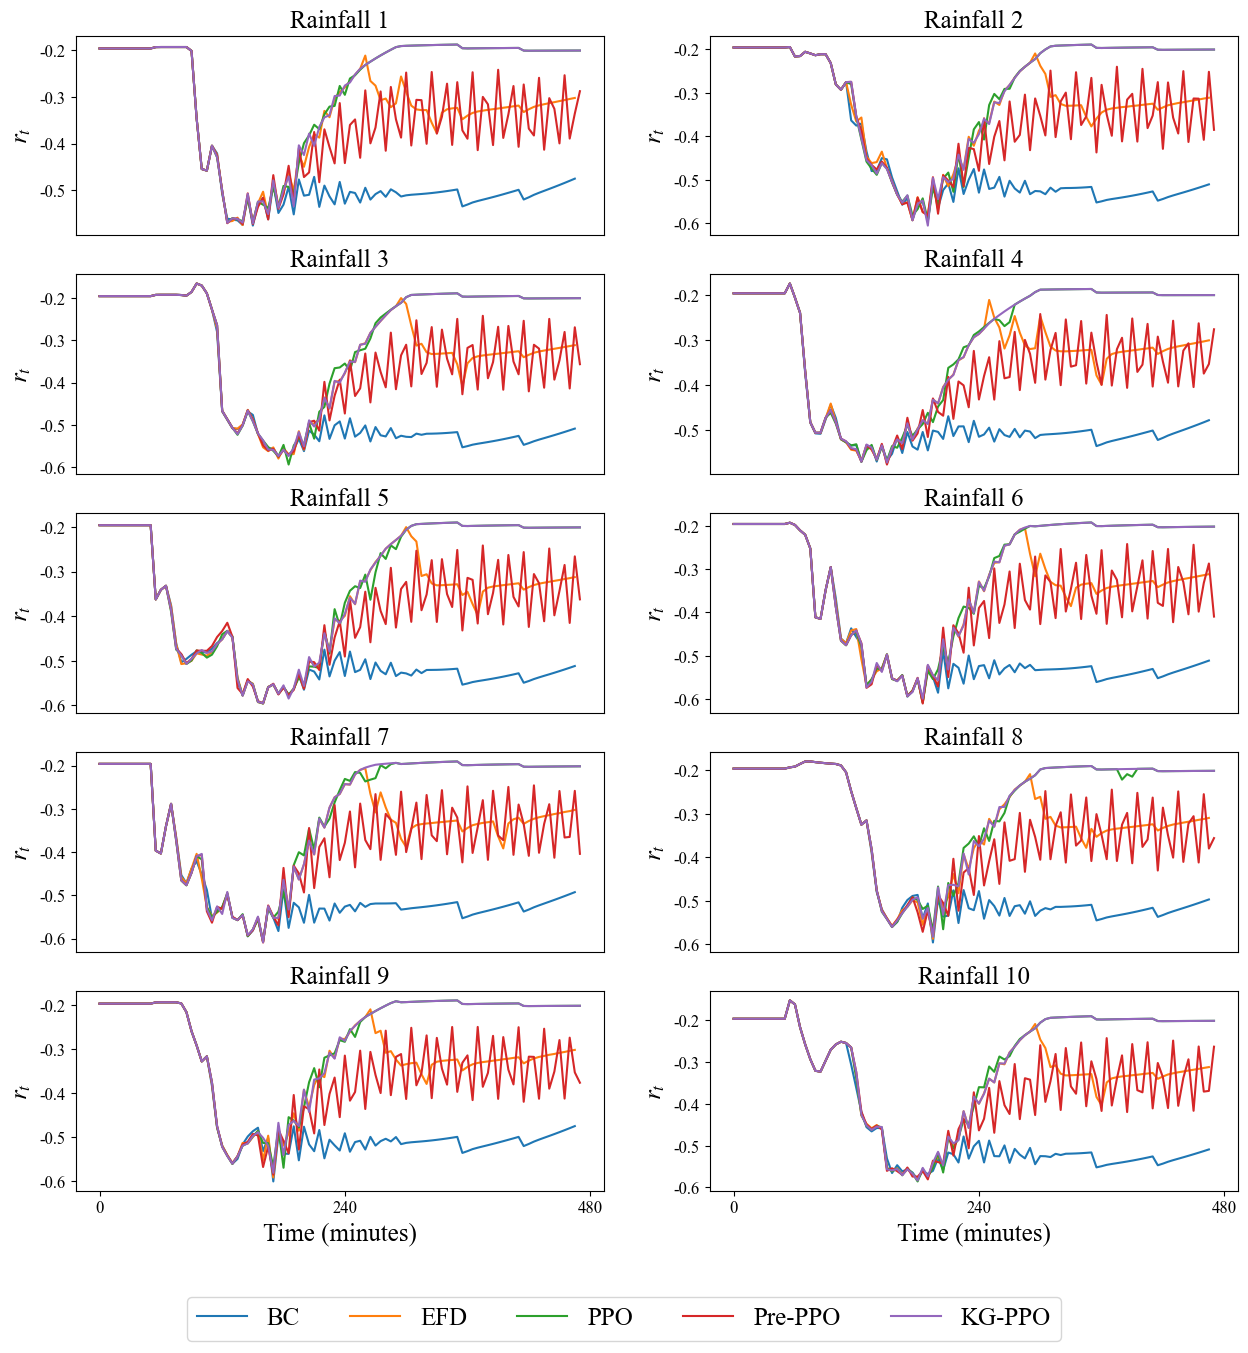

In [28]:
# designing rainfall
# PPO reward_t
fig,ax = plt.subplots(5,2,figsize=(15,15))
a = 18
for i in range(5):
    if i == 0:
        ax[i,0].set_ylabel('$r_{t}$',fontsize=a)
        ax[i,1].set_ylabel('$r_{t}$',fontsize=a)
        ax[i,0].set_title('Rainfall '+str(i*2+1),fontsize=a)
        
        ax[i,1].set_title('Rainfall '+str(i*2+1+1),fontsize=a)
        ax[i,0].set_xticks([])
        ax[i,1].set_xticks([])
        
        ax[i,0].plot(np.array(results_BC['rain'+str(rainid[i*2])]['rewards'][2:]),label='BC')
        ax[i,0].plot(np.array(results_EFD['rain'+str(rainid[i*2])]['rewards'][2:]),label='EFD')

        ax[i,0].plot(np.array(results_PPO['rain'+str(rainid[i*2])]['rewards'][:]),label='PPO')
        ax[i,0].plot(np.array(results_PPO_pre['rain'+str(rainid[i*2])]['rewards'][:]),label='Pre-PPO')
        ax[i,0].plot(np.array(results_PPO_KG['rain'+str(rainid[i*2])]['rewards'][:]),label='KG-PPO')

        ax[i,1].plot(np.array(results_BC['rain'+str(rainid[i*2+1])]['rewards'][2:]))
        ax[i,1].plot(np.array(results_EFD['rain'+str(rainid[i*2+1])]['rewards'][2:]))

        ax[i,1].plot(np.array(results_PPO['rain'+str(rainid[i*2+1])]['rewards'][:]))
        ax[i,1].plot(np.array(results_PPO_pre['rain'+str(rainid[i*2+1])]['rewards'][:]))
        ax[i,1].plot(np.array(results_PPO_KG['rain'+str(rainid[i*2+1])]['rewards'][:]))
    else:
        ax[i,0].set_ylabel('$r_{t}$',fontsize=a)
        ax[i,1].set_ylabel('$r_{t}$',fontsize=a)
        ax[i,0].set_title('Rainfall '+str(i*2+1),fontsize=a)
        ax[i,1].set_title('Rainfall '+str(i*2+1+1),fontsize=a)
        ax[i,0].set_xticks([])
        ax[i,1].set_xticks([])
        
        ax[i,0].plot(np.array(results_BC['rain'+str(rainid[i*2])]['rewards'][2:]))
        ax[i,0].plot(np.array(results_EFD['rain'+str(rainid[i*2])]['rewards'][2:]))

        ax[i,0].plot(np.array(results_PPO['rain'+str(rainid[i*2])]['rewards'][:]))
        ax[i,0].plot(np.array(results_PPO_pre['rain'+str(rainid[i*2])]['rewards'][:]))
        ax[i,0].plot(np.array(results_PPO_KG['rain'+str(rainid[i*2])]['rewards'][:]))

        ax[i,1].plot(np.array(results_BC['rain'+str(rainid[i*2+1])]['rewards'][2:]))
        ax[i,1].plot(np.array(results_EFD['rain'+str(rainid[i*2+1])]['rewards'][2:]))

        ax[i,1].plot(np.array(results_PPO['rain'+str(rainid[i*2+1])]['rewards'][:]))
        ax[i,1].plot(np.array(results_PPO_pre['rain'+str(rainid[i*2+1])]['rewards'][:]))
        ax[i,1].plot(np.array(results_PPO_KG['rain'+str(rainid[i*2+1])]['rewards'][:]))

fig.legend(ncols=5,loc='lower center',fontsize=a)


for i in range(2):
    ax[4,i].set_xlabel('Time (minutes)',fontsize=a)
    ax[4,i].set_xticks([0,96/2,96],['0','240','480'])
plt.savefig('./figure_PPO_rewardt.png',dpi=200,bbox_inches='tight')

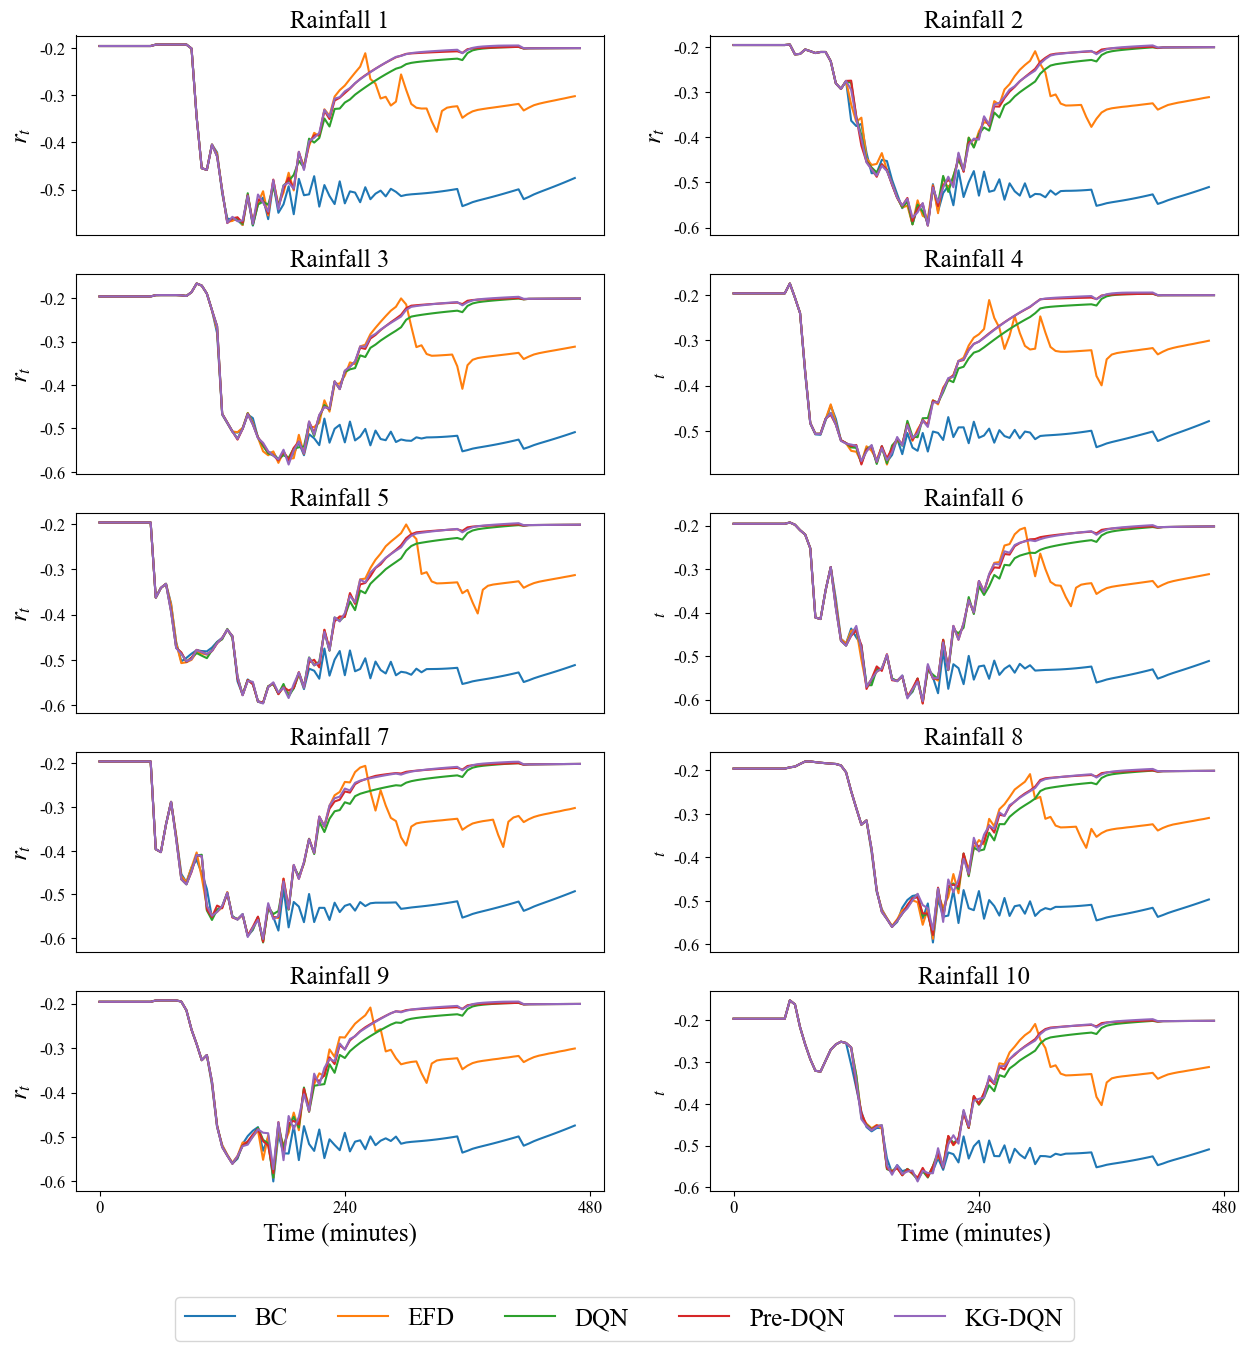

In [30]:
# designing rainfall
# DQN
fig,ax = plt.subplots(5,2,figsize=(15,15))
a = 18
for i in range(5):
    if i == 0:
        ax[i,0].set_ylabel('$r_{t}$',fontsize=a)
        ax[i,1].set_ylabel('$r_{t}$',fontsize=a)
        ax[i,0].set_title('Rainfall '+str(i*2+1),fontsize=a)
        
        ax[i,1].set_title('Rainfall '+str(i*2+1+1),fontsize=a)
        ax[i,0].set_xticks([])
        ax[i,1].set_xticks([])
        
        ax[i,0].plot(np.array(results_BC['rain'+str(rainid[i*2])]['rewards'][2:]),label='BC')
        ax[i,0].plot(np.array(results_EFD['rain'+str(rainid[i*2])]['rewards'][2:]),label='EFD')
        ax[i,0].plot(np.array(results_DQN['rain'+str(rainid[i*2])]['rewards'][:]),label='DQN')
        ax[i,0].plot(np.array(results_DQN_pre['rain'+str(rainid[i*2])]['rewards'][:]),label='Pre-DQN')
        ax[i,0].plot(np.array(results_DQN_KG['rain'+str(rainid[i*2])]['rewards'][:]),label='KG-DQN')

        ax[i,1].plot(np.array(results_BC['rain'+str(rainid[i*2+1])]['rewards'][2:]))
        ax[i,1].plot(np.array(results_EFD['rain'+str(rainid[i*2+1])]['rewards'][2:]))
        ax[i,1].plot(np.array(results_DQN['rain'+str(rainid[i*2+1])]['rewards'][:]))
        ax[i,1].plot(np.array(results_DQN_pre['rain'+str(rainid[i*2+1])]['rewards'][:]))
        ax[i,1].plot(np.array(results_DQN_KG['rain'+str(rainid[i*2+1])]['rewards'][:]))
        
    else:
        ax[i,0].set_ylabel('$r_{t}$',fontsize=a)
        ax[i,1].set_ylabel('$_{t}$',fontsize=a)
        ax[i,0].set_title('Rainfall '+str(i*2+1),fontsize=a)
        ax[i,1].set_title('Rainfall '+str(i*2+1+1),fontsize=a)
        ax[i,0].set_xticks([])
        ax[i,1].set_xticks([])
        
        ax[i,0].plot(np.array(results_BC['rain'+str(rainid[i*2])]['rewards'][2:]))
        ax[i,0].plot(np.array(results_EFD['rain'+str(rainid[i*2])]['rewards'][2:]))

        ax[i,0].plot(np.array(results_DQN['rain'+str(rainid[i*2])]['rewards'][:]))
        ax[i,0].plot(np.array(results_DQN_pre['rain'+str(rainid[i*2])]['rewards'][:]))
        ax[i,0].plot(np.array(results_DQN_KG['rain'+str(rainid[i*2])]['rewards'][:]))

        ax[i,1].plot(np.array(results_BC['rain'+str(rainid[i*2+1])]['rewards'][2:]))
        ax[i,1].plot(np.array(results_EFD['rain'+str(rainid[i*2+1])]['rewards'][2:]))

        ax[i,1].plot(np.array(results_DQN['rain'+str(rainid[i*2+1])]['rewards'][:]))
        ax[i,1].plot(np.array(results_DQN_pre['rain'+str(rainid[i*2+1])]['rewards'][:]))
        ax[i,1].plot(np.array(results_DQN_KG['rain'+str(rainid[i*2+1])]['rewards'][:]))

fig.legend(ncols=5,loc='lower center',fontsize=a)


for i in range(2):
    ax[4,i].set_xlabel('Time (minutes)',fontsize=a)
    ax[4,i].set_xticks([0,96/2,96],['0','240','480'])
plt.savefig('./figure_DQN_rewardt.png',dpi=200,bbox_inches='tight')

# F+C

In [22]:
rain1 = np.load('step0-knowledge\\rainfall\\real_rainfall\\rain1.npy').tolist()
rain2 = np.load('step0-knowledge\\rainfall\\real_rainfall\\rain2.npy').tolist()
rain3 = np.load('step0-knowledge\\rainfall\\real_rainfall\\rain3.npy').tolist()
rain4 = np.load('step0-knowledge\\rainfall\\real_rainfall\\rain4.npy').tolist()
raindata={}
for i in rainid:
    raindata[i]=[]
    tem1, tem2, tem3, tem4 = [],[],[],[]
    for it in zip(rain1[i],rain2[i],rain3[i],rain4[i]):
        tem1.append(float(it[0][1]))
        tem2.append(float(it[1][1]))
        tem3.append(float(it[2][1]))
        tem4.append(float(it[3][1]))
    raindata[i].append(tem1)
    raindata[i].append(tem2)
    raindata[i].append(tem3)
    raindata[i].append(tem4)

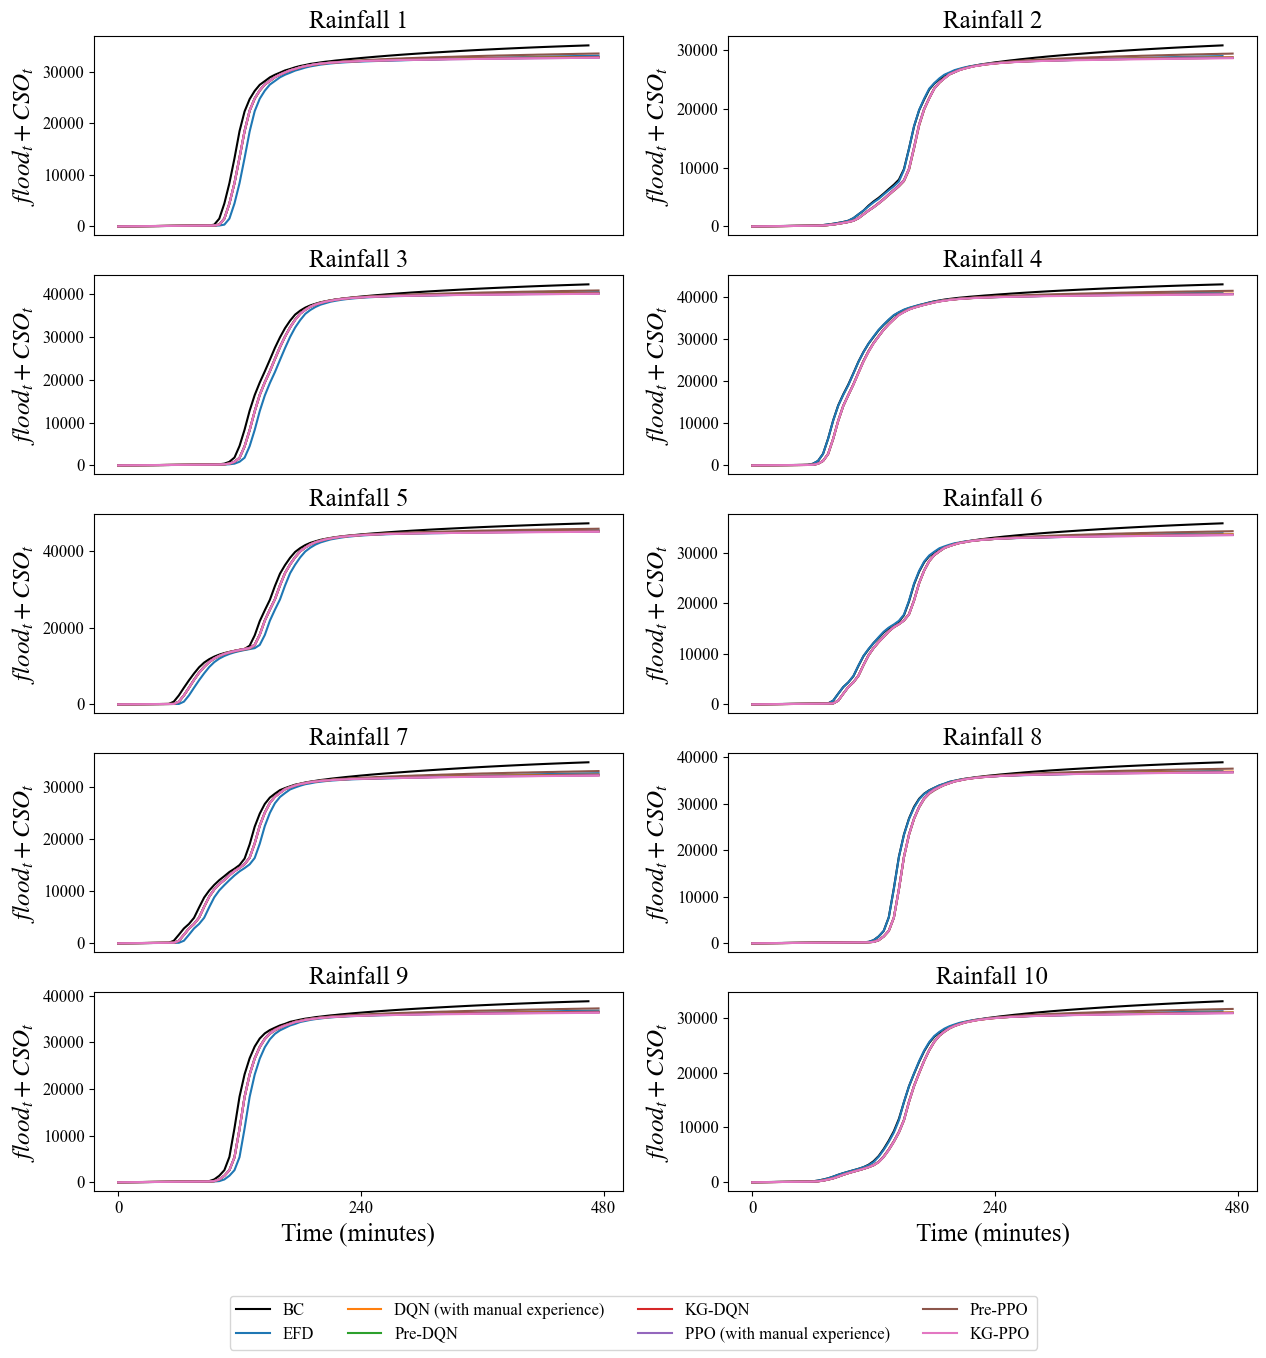

In [25]:
# designing rainfall
fig,ax = plt.subplots(5,2,figsize=(15,15))
a = 18
for i in range(5):
    ax[i,0].set_ylabel('$flood_{t}+CSO_{t}$',fontsize=a)
    ax[i,1].set_ylabel('$flood_{t}+CSO_{t}$',fontsize=a)
    ax[i,0].set_title('Rainfall '+str(i*2+1),fontsize=a)
    ax[i,1].set_title('Rainfall '+str(i*2+1+1),fontsize=a)
    ax[i,0].set_xticks([])
    ax[i,1].set_xticks([])
    
    if i == 0:
        ax[i,0].plot(np.array(results_BC['rain'+str(rainid[i*2])]['flooding'][2:])+np.array(results_BC['rain'+str(rainid[i*2])]['CSO'][2:]),label='BC',color='k')
        ax[i,0].plot(np.array(results_EFD['rain'+str(rainid[i*2])]['flooding'][2:])+np.array(results_EFD['rain'+str(rainid[i*2])]['CSO'][2:]),label='EFD')
        #ax[i,0].plot(np.array(results_OPT['rain'+str(rainid[i*2])]['flooding'][:])+np.array(results_OPT['rain'+str(rainid[i*2])]['CSO'][:]),label='OPT')
        ax[i,0].plot(np.array(results_DQN['rain'+str(rainid[i*2])]['flooding'][:])+np.array(results_DQN['rain'+str(rainid[i*2])]['CSO'][:]),label='DQN (with manual experience)')
        #ax[i,0].plot(np.array(results_DQN_nosafe['rain'+str(rainid[i*2])]['flooding'][:])+np.array(results_DQN_nosafe['rain'+str(rainid[i*2])]['CSO'][:]),label='DQN (without manual experience)')
        ax[i,0].plot(np.array(results_DQN_pre['rain'+str(rainid[i*2])]['flooding'][:])+np.array(results_DQN_pre['rain'+str(rainid[i*2])]['CSO'][:]),label='Pre-DQN')
        ax[i,0].plot(np.array(results_DQN_KG['rain'+str(rainid[i*2])]['flooding'][:])+np.array(results_DQN_KG['rain'+str(rainid[i*2])]['CSO'][:]),label='KG-DQN')
        ax[i,0].plot(np.array(results_PPO['rain'+str(rainid[i*2])]['flooding'][:])+np.array(results_PPO['rain'+str(rainid[i*2])]['CSO'][:]),label='PPO (with manual experience)')
        #ax[i,0].plot(np.array(results_PPO_nosafe['rain'+str(rainid[i*2])]['flooding'][:])+np.array(results_PPO_nosafe['rain'+str(rainid[i*2])]['CSO'][:]),label='PPO (without manual experience)')
        ax[i,0].plot(np.array(results_PPO_pre['rain'+str(rainid[i*2])]['flooding'][:])+np.array(results_PPO_pre['rain'+str(rainid[i*2])]['CSO'][:]),label='Pre-PPO')
        ax[i,0].plot(np.array(results_PPO_KG['rain'+str(rainid[i*2])]['flooding'][:])+np.array(results_PPO_KG['rain'+str(rainid[i*2])]['CSO'][:]),label='KG-PPO')
    else:
        ax[i,0].plot(np.array(results_BC['rain'+str(rainid[i*2])]['flooding'][2:])+np.array(results_BC['rain'+str(rainid[i*2])]['CSO'][2:]),color='k')
        ax[i,0].plot(np.array(results_EFD['rain'+str(rainid[i*2])]['flooding'][2:])+np.array(results_EFD['rain'+str(rainid[i*2])]['CSO'][2:]))
        #ax[i,0].plot(np.array(results_OPT['rain'+str(rainid[i*2])]['flooding'][:])+np.array(results_OPT['rain'+str(rainid[i*2])]['CSO'][:]))
        ax[i,0].plot(np.array(results_DQN['rain'+str(rainid[i*2])]['flooding'][:])+np.array(results_DQN['rain'+str(rainid[i*2])]['CSO'][:]))
        #ax[i,0].plot(np.array(results_DQN_nosafe['rain'+str(rainid[i*2])]['flooding'][:])+np.array(results_DQN_nosafe['rain'+str(rainid[i*2])]['CSO'][:]))
        ax[i,0].plot(np.array(results_DQN_pre['rain'+str(rainid[i*2])]['flooding'][:])+np.array(results_DQN_pre['rain'+str(rainid[i*2])]['CSO'][:]))
        ax[i,0].plot(np.array(results_DQN_KG['rain'+str(rainid[i*2])]['flooding'][:])+np.array(results_DQN_KG['rain'+str(rainid[i*2])]['CSO'][:]))
        ax[i,0].plot(np.array(results_PPO['rain'+str(rainid[i*2])]['flooding'][:])+np.array(results_PPO['rain'+str(rainid[i*2])]['CSO'][:]))
        #ax[i,0].plot(np.array(results_PPO_nosafe['rain'+str(rainid[i*2])]['flooding'][:])+np.array(results_PPO_nosafe['rain'+str(rainid[i*2])]['CSO'][:]))
        ax[i,0].plot(np.array(results_PPO_pre['rain'+str(rainid[i*2])]['flooding'][:])+np.array(results_PPO_pre['rain'+str(rainid[i*2])]['CSO'][:]))
        ax[i,0].plot(np.array(results_PPO_KG['rain'+str(rainid[i*2])]['flooding'][:])+np.array(results_PPO_KG['rain'+str(rainid[i*2])]['CSO'][:]))
    
    #ax[i,0].legend()
    
    #ax0 = ax[i,0].twinx()
    #ax0.invert_yaxis()
    #ax0.plot(raindata[rainid[i*2]][0])

    ax[i,1].plot(np.array(results_BC['rain'+str(rainid[i*2+1])]['flooding'][2:])+np.array(results_BC['rain'+str(rainid[i*2+1])]['CSO'][2:]),color='k')
    ax[i,1].plot(np.array(results_EFD['rain'+str(rainid[i*2+1])]['flooding'][2:])+np.array(results_EFD['rain'+str(rainid[i*2+1])]['CSO'][2:]))
    #ax[i,1].plot(np.array(np.array(results_OPT['rain'+str(rainid[i*2+1])]['flooding'][:])+np.array(results_OPT['rain'+str(rainid[i*2+1])]['CSO'][:])))
    ax[i,1].plot(np.array(results_DQN['rain'+str(rainid[i*2+1])]['flooding'][:])+np.array(results_DQN['rain'+str(rainid[i*2+1])]['CSO'][:]))
    #ax[i,1].plot(np.array(results_DQN_nosafe['rain'+str(rainid[i*2+1])]['flooding'][:])+np.array(results_DQN_nosafe['rain'+str(rainid[i*2+1])]['CSO'][:]))
    ax[i,1].plot(np.array(results_DQN_pre['rain'+str(rainid[i*2+1])]['flooding'][:])+np.array(results_DQN_pre['rain'+str(rainid[i*2+1])]['CSO'][:]))
    ax[i,1].plot(np.array(results_DQN_KG['rain'+str(rainid[i*2+1])]['flooding'][:])+np.array(results_DQN_KG['rain'+str(rainid[i*2+1])]['CSO'][:]))
    ax[i,1].plot(np.array(results_PPO['rain'+str(rainid[i*2+1])]['flooding'][:])+np.array(results_PPO['rain'+str(rainid[i*2+1])]['CSO'][:]))
    #ax[i,1].plot(np.array(results_PPO_nosafe['rain'+str(rainid[i*2+1])]['flooding'][:])+np.array(results_PPO_nosafe['rain'+str(rainid[i*2+1])]['CSO'][2:]))
    ax[i,1].plot(np.array(results_PPO_pre['rain'+str(rainid[i*2+1])]['flooding'][:])+np.array(results_PPO_pre['rain'+str(rainid[i*2+1])]['CSO'][:]))
    ax[i,1].plot(np.array(results_PPO_KG['rain'+str(rainid[i*2+1])]['flooding'][:])+np.array(results_PPO_KG['rain'+str(rainid[i*2+1])]['CSO'][:]))
    
    #ax1 = ax[i,1].twinx()
    #ax1.invert_yaxis()
    #ax1.plot(raindata[rainid[i*2+1]][0])
    
fig.legend(ncols=4,loc='lower center')

for i in range(2):
    ax[4,i].set_xlabel('Time (minutes)',fontsize=a)
    ax[4,i].set_xticks([0,96/2,96],['0','240','480'])
plt.savefig('./figure_FCt.png',dpi=200,bbox_inches='tight')